# TASK: 어떤 종류의 사람들이 많이 살아남았는지에 대한 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# sample 수가 너무 적어 deep learning은 부적합
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

print(train.shape, '\n', train.keys())
print(test.shape, '\n', test.keys())

(891, 12) 
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
(418, 11) 
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


- PassengerId: 탑승객의 고유 아이디
- Survived: 생존여부(label)
- Pclass: 등실의 등급(1등급, 2등급, 3등급)
- Name: 이름
- Sex: 성별
- Age: 나이
- SibSp: 함게 탑승한 형제 자매, 아내 남편의 수(수평)
- Parch: 함께 탑승한 부모, 자식의 수(수직)
- Ticket: 티켓번호
- Fare: 티켓의 요금
- Cabin: 객실 번호
- Embarked: 배에 탑승한 위치(C=Cherbourg, Q=Queenstown, S=Southampton)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Survived check

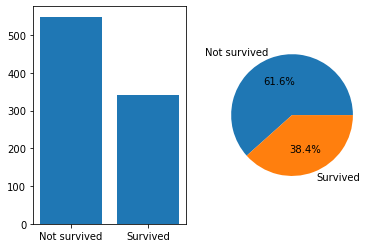

In [4]:
x = train['Survived'].value_counts()
fig, axes= plt.subplots(1,2)
axes[0].bar(x=['Not survived', 'Survived'], height=x)
axes[1].pie(x,labels=['Not survived', 'Survived'], autopct='%.1f%%')
plt.show()
# plt.pie()

# Nan check

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_nan_list = []
print('TRAIN')
for key in train.keys():
    if train[key].isnull().sum()>0:
        print(f"Exist Null in {key}, {train[key].isnull().sum()}")
        train_nan_list.append(key)

test_nan_list = []
print('TEST')
for key in test.keys():
    if test[key].isnull().sum()>0:
        print(f"Exist Null in {key}, {test[key].isnull().sum()}")
        test_nan_list.append(key)

TRAIN
Exist Null in Age, 177
Exist Null in Cabin, 687
Exist Null in Embarked, 2
TEST
Exist Null in Age, 86
Exist Null in Fare, 1
Exist Null in Cabin, 327



- Nan 처리
1. cabin(객실 번호)의 경우 직관적으로 생존과 관계 없고 그 양도 너무 많아서 제거
2. Embark(탑승 위치)의 경우 직관적으로 생존과 관계 없고 그 양이 굉장히 적기 때문에 빈도가 가장 많은 값으로 대체(분포)
3. Fare(티켓 요금)의 경우 1개에 불과하므로 평균값으로 대체(분포)
4. Age는 어릴수록 먼저 구해줄 것으로 예상(직관적으로 관계가 있다 생각) 따라서 값을 처리해주도록 노력
- 분포
- corr을 통한 종속성 확인

In [7]:
# 1. cabin
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)
print(train.shape, test.shape)
train.head()

(891, 11) (418, 10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


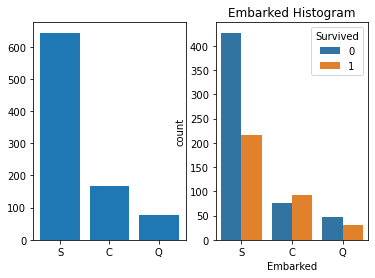

In [8]:
# 2. Embarked
fig, axes = plt.subplots(1,2)
x = train['Embarked'].value_counts()
plt.title("Embarked Histogram")
axes[0].bar(x=x.keys(), height=x)
sns.countplot(data=train, x='Embarked', hue='Survived', ax=axes[1])
plt.show()

index = train[train['Embarked'].isnull()].index
for i in index:
    train.loc[i, 'Embarked']='S'

32.2042079685746


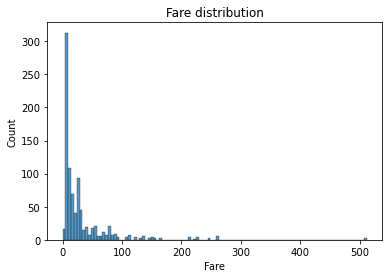

In [9]:
# 3. Fare in test -> train의 평균 이용
plt.figure()
x = train['Fare']
plt.title("Fare distribution")
sns.histplot(x)
print(x.mean())
index = test[test['Fare'].isnull()].index.item()
test.loc[index,'Fare']=x.mean()

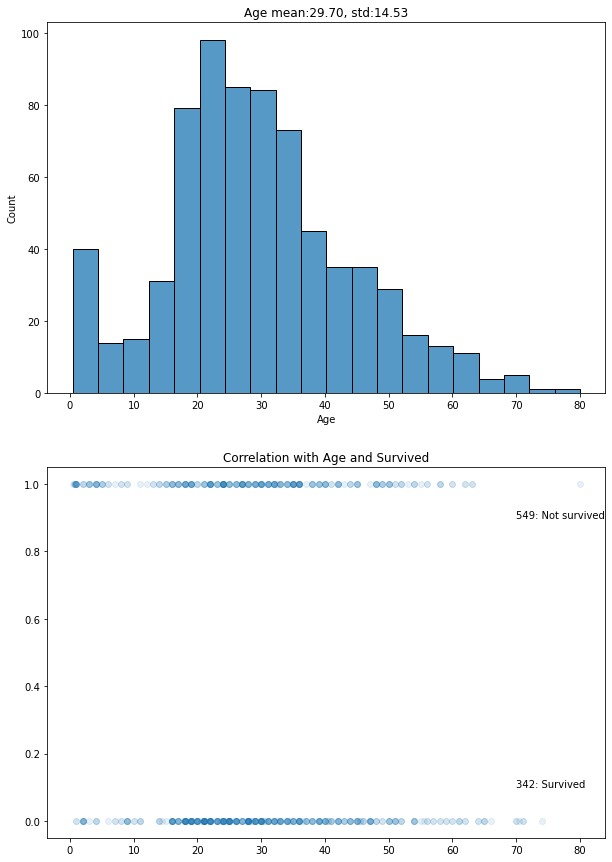

In [10]:
# 4. Age
fig, axes = plt.subplots(2,1, figsize=(10,15))
# 분포
x = train['Age']
y = train['Survived']

axes[0].set_title(f'Age mean:{x.mean():.2f}, std:{x.std():.2f}')
sns.histplot(x, ax=axes[0])

# corr with survived
axes[1].set_title("Correlation with Age and Survived")
axes[1].scatter(x=x, y=y, alpha=0.1)
axes[1].text(70, 0.9, '549: Not survived')
axes[1].text(70, 0.1, '342: Survived')
plt.show()
plt.close()


PassengerId    0.036847
Survived      -0.077221
Pclass        -0.369226
Age            1.000000
SibSp         -0.308247
Parch         -0.189119
Fare           0.096067
Name: Age, dtype: float64


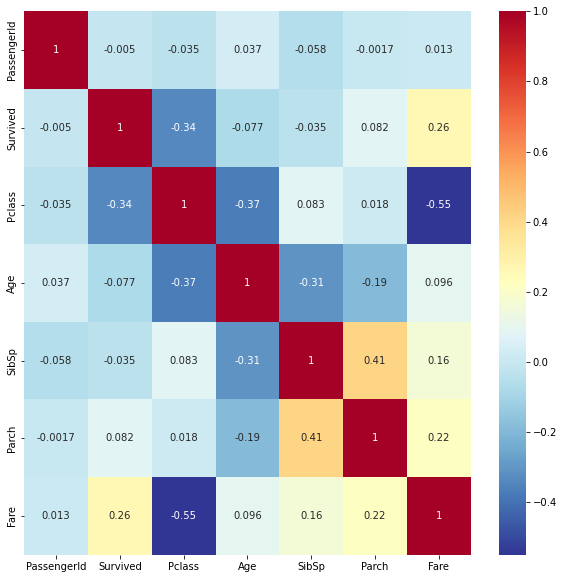

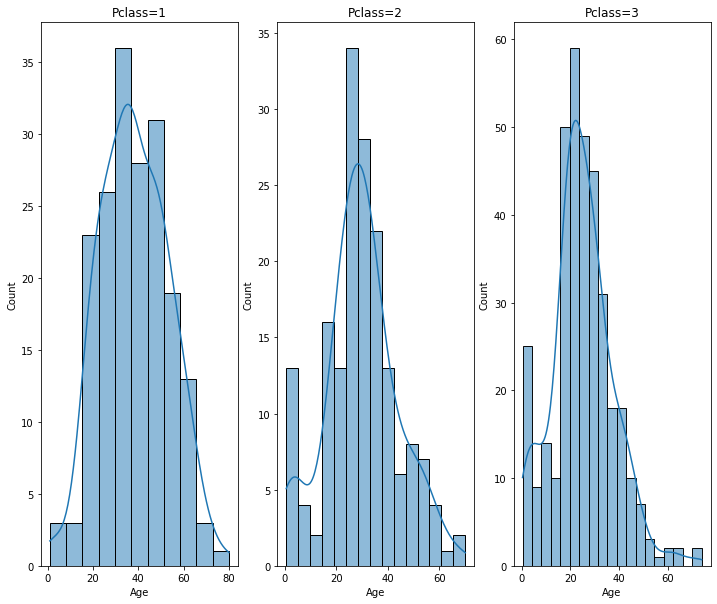

In [11]:
# 타 feature들과의 상관관계 확인(종속성을 보자!)
corr = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True, cmap='RdYlBu_r')
print(corr['Age'])


# Pclass에 따른 Age의 분포
x, y = train['Age'], train['Pclass']
fig, axes = plt.subplots(1, 3, figsize=(12,10))
axes[0].set_title('Pclass=1')
sns.histplot(x[y==1], kde=True, ax=axes[0])
axes[1].set_title('Pclass=2')
sns.histplot(x[y==2], kde=True, ax=axes[1])
axes[2].set_title('Pclass=3')
sns.histplot(x[y==3], kde=True, ax=axes[2])
plt.show()
plt.close()

# Fill Age's nan using Pclass
for i in range(3):
    mean = x[y==i].mean()
    train.loc[(train['Pclass']==i)]['Age'].fillna(mean)


In [12]:
na_list = []

for i, na in train['Age'].isnull().items():
    if na == True: na_list.append(i)

    
    
mean1 = x[y==1].mean()
mean2 = x[y==2].mean()
mean3 = x[y==3].mean()

for k, v in train.loc[na_list,'Pclass'].items():
    if v==1: train.loc[k,'Age']=mean1
    if v==2: train.loc[k,'Age']=mean2
    if v==3: train.loc[k,'Age']=mean3

    
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
na_list = []

for i, na in test['Age'].isnull().items():
    if na == True: na_list.append(i)
    
    
for k, v in test.loc[na_list,'Pclass'].items():
    if v==1: test.loc[k,'Age']=mean1
    if v==2: test.loc[k,'Age']=mean2
    if v==3: test.loc[k,'Age']=mean3
    
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Categorical 
- Name(이름): 제거 - 직관적으로 생존과 무관
- Ticket(티켓번호): 제거 - 직관적으로 생존과 무관
- Embarked(배에 탑승한 위치) - S:0, C:1, Q:2
- Sex(성별) - m:0, F:1

In [14]:
# Name, Ticket
train.drop('Name', axis=1, inplace=True)
train.drop('Ticket', axis=1, inplace=True)

test.drop('Name', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

In [15]:
# Sex
train.loc[train.Sex=='male', 'Sex']=0
train.loc[train.Sex=='female', 'Sex']=1

test.loc[test.Sex=='male', 'Sex']=0
test.loc[test.Sex=='female', 'Sex']=1

In [16]:
# Embarked
train.loc[train.Embarked=='S', 'Embarked']=0
train.loc[train.Embarked=='C', 'Embarked']=1
train.loc[train.Embarked=='Q', 'Embarked']=2

test.loc[test.Embarked=='S', 'Embarked']=0
test.loc[test.Embarked=='C', 'Embarked']=1
test.loc[test.Embarked=='Q', 'Embarked']=2

In [17]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [18]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


In [19]:
train.to_csv('train_df.csv')
test.to_csv('test_df.csv')